In [1]:
# %load CommonFunctions.py


# # COMMON ATOMIC AND ASTRING FUNCTIONS

# In[14]:

############### One String Pulse with width, shift and scale #############
def StringPulse(String1, t: float, a = 1., b = 0., c = 1., d = 0.) -> float:
    x = (t - b)/a
    if (x < -1):
        res = -0.5
    elif (x > 1):
        res = 0.5
    else:
        res = String1(x)
    res = d + res * c
    return res


# In[16]:


###### Atomic String Applied to list with width, shift and scale #############
def String(String1, x: list, a = 1., b = 0., c = 1., d = 0.) -> list:
    res = []
    for i in range(len(x)):
        res.append(StringPulse(String1, x[i], a, b, c, d))
    return res


# In[17]:


###### Summation of two lists #############
def Sum(x1: list, x2: list) -> list:
    res = []
    for i in range(len(x1)):
        res.append(x1[i] + x2[i])
    return res


# In[18]:


##########################################################
##This script introduces Atomic Function 
################### One Pulse of atomic function
def up1(x: float) -> float:
    #Atomic function table
    up_y = [0.5, 0.48, 0.460000017,0.440000421,0.420003478,0.400016184, 0.380053256, 0.360139056, 0.340308139, 0.320605107,
           0.301083436, 0.281802850, 0.262826445, 0.244218000, 0.226041554, 0.208361009, 0.191239338, 0.174736305, 
           0.158905389, 0.143991189, 0.129427260, 0.115840866, 0.103044024, 0.9110444278e-01, 0.798444445e-01, 0.694444445e-01, 
           0.598444445e-01, 0.510444877e-01, 0.430440239e-01, 0.358409663e-01, 0.294282603e-01, 0.237911889e-01, 0.189053889e-01, 
           0.147363055e-01, 0.112393379e-01, 0.836100883e-02, 0.604155412e-02, 0.421800000e-02, 0.282644445e-02, 0.180999032e-02, 
           0.108343562e-02, 0.605106267e-03, 0.308138660e-03, 0.139055523e-03, 0.532555251e-04, 0.161841328e-04, 0.347816874e-05, 
           0.420576116e-05, 0.167693347e-07, 0.354008603e-10, 0]
    up_x = np.arange(0.5, 1.01, 0.01)

    res = 0.
    if ((x >= 0.5) and (x <= 1)):
        for i in range(len(up_x) - 1):
            if (up_x[i] >= x) and (x < up_x[i+1]):
                N1 = 1 - (x - up_x[i])/0.01
                res = N1 * up_y[i] + (1 - N1) * up_y[i+1]
                return res
    return res


# In[19]:
############### Atomic Function Pulse with width, shift and scale #############
def pulse(up1, t = 0., a = 1., b = 0., c = 1., d = 0.) -> float:
    x = (t - b)/a
    res = 0.
    if (x >= 0.5) and (x <= 1):
        res = up1(x)
    elif (x >= 0.0) and (x < 0.5):
        res = 1 - up1(1 - x)
    elif (x >= -1 and x <= -0.5):
        res = up1(-x)
    elif (x > -0.5) and (x < 0):
        res = 1 - up1(1 + x)
    res = d + res * c
    return res

############### Atomic Function Applied to list with width, shift and scale #############
def up(up1, x: list, a = 1., b = 0., c = 1., d = 0.) -> list:
    res = []
    for i in range(len(x)):
        res.append(pulse(up1, x[i], a, b, c, d))
    return res

############### Atomic String #############
def AString1(x: float) -> float:
    res = 1 * (pulse(up1, x/2.0 - 0.5) - 0.5)
    return res

############### Atomic String Pulse with width, shift and scale #############
def AStringPulse(t: float, a = 1., b = 0., c = 1., d = 0.) -> float:
    x = (t - b)/a
    if (x < -1):
        res = -0.5
    elif (x > 1):
        res = 0.5
    else:
        res = AString1(x)
    res = d + res * c
    return res

###### Atomic String Applied to list with width, shift and scale #############
def AString(x: list, a = 1., b = 0., c = 1., d = 0.) -> list:
    res = []
    for i in range(len(x)):
        res.append(AStringPulse(x[i], a, b, c, d))
    return res



In [2]:
import numpy as np
import pylab as pl

In [3]:
x = np.arange(-2.0, 2.0, 0.01)

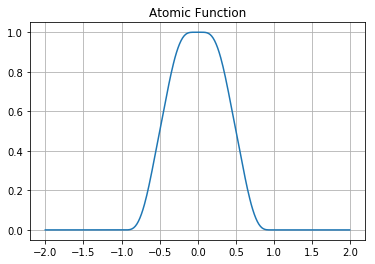

In [4]:
pl.title('Atomic Function')
pl.plot(x, up(up1, x), label='Atomic Function')
pl.grid(True)
pl.show()

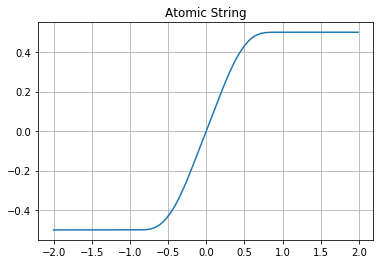

In [5]:
pl.title('Atomic String')
pl.plot(x, String(AString1, x, 1.0, 0, 1, 0), label='Atomic String')
pl.grid(True)
pl.show()

## AStrings Compounding

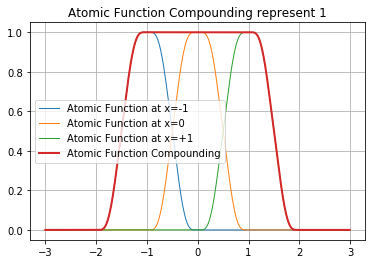

In [6]:
x = np.arange(-3.0, 3.0, 0.01)
width = 1.
height = 1.
pl.plot(x, up(up1, x, width, -1*width, height), linewidth=1, label='Atomic Function at x=-1')
pl.plot(x, up(up1, x, width, +0*width, height), linewidth=1, label='Atomic Function at x=0')
pl.plot(x, up(up1, x, width, +1*width, height), linewidth=1, label='Atomic Function at x=+1')
pl.plot(x, Sum(up(up1, x, width, -1*width, height), Sum(up(up1, x, width, 0*width, height), up(up1, x, width, 1*width, height))), 
        linewidth=2, label='Atomic Function Compounding')
pl.title('Atomic Function Compounding represent 1')
pl.legend(loc='best', numpoints=1)
pl.grid(True)
pl.show()

## Representing Polynomials

### Straight Line

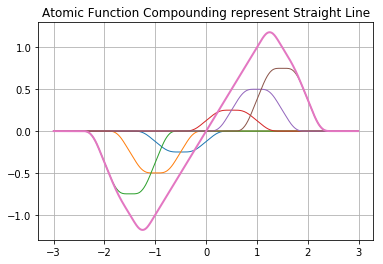

In [7]:
x = np.arange(-3.0, 3.0, 0.01)
a = 1.
c = 0.25
b = 1.

pl.plot(x, up(up1, x, -a, -1.*b/2, -c*1), linewidth=1, label='AF at 1b/2, c*1')
pl.plot(x, up(up1, x, -a, -2.*b/2, -c*2), linewidth=1, label='AF at 2b/2, c*2')
pl.plot(x, up(up1, x, -a, -3.*b/2, -c*3), linewidth=1, label='AF at 3b/2, c*3')

pl.plot(x, up(up1, x, a, 1.*b/2, c*1), linewidth=1, label='AF at 1b/2, c*1')
pl.plot(x, up(up1, x, a, 2.*b/2, c*2), linewidth=1, label='AF at 2b/2, c*2')
pl.plot(x, up(up1, x, a, 3.*b/2, c*3), linewidth=1, label='AF at 3b/2, c*3')

pl.plot(x,
        Sum(
            Sum(up(up1, x, a, 1.*b/2, c*1), Sum(up(up1, x, a, 2.*b/2, c*2), up(up1, x, a, 3.*b/2, c*3))),
            Sum(up(up1, x, -a, -1.*b/2, -c*1), Sum(up(up1, x, -a, -2.*b/2, -c*2), up(up1, x, -a, -3.*b/2, -c*3)))
        ),
        linewidth=2, label='Atomic Function Compounding')

pl.title('Atomic Function Compounding represent Straight Line')
# pl.legend(loc='best', numpoints=1)
pl.grid(True)
pl.show()

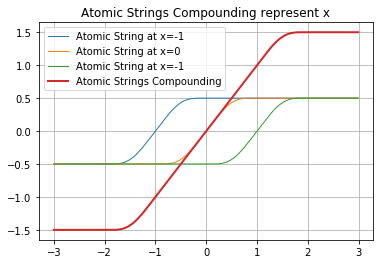

In [8]:
x = np.arange(-3.0, 3.0, 0.01)
width = 1.
height = 1.
pl.plot(x, String(AString1, x, width, -1*width, height), linewidth=1, label='Atomic String at x=-1')
pl.plot(x, String(AString1, x, width, +0*width, height), linewidth=1, label='Atomic String at x=0')
pl.plot(x, String(AString1, x, width, +1*width, height), linewidth=1, label='Atomic String at x=-1')
pl.plot(x, Sum(String(AString1, x, width, -1.0*width, height), 
           Sum(String(AString1, x, width, 0*width, height), String(AString1, x, width, 1.0*width, height))), 
           linewidth=2, label='Atomic Strings Compounding')
pl.title('Atomic Strings Compounding represent x')
pl.legend(loc='best', numpoints=1)
pl.grid(True)
pl.show()

## Atomic Function As a Statistical Distribution

(array([  3.,   1.,   1.,   4.,   6.,   5.,  11.,   4.,  16.,  22.,  22.,
         27.,  31.,  33.,  38.,  48.,  50.,  62.,  61.,  96.,  97., 115.,
        103., 127., 127., 131., 164., 221., 229., 214., 244., 245., 257.,
        258., 303., 323., 286., 315., 335., 372., 357., 404., 422., 396.,
        458., 484., 491., 476., 489., 570., 509., 550., 575., 604., 599.,
        623., 647., 657., 662., 665., 684., 706., 715., 792., 753., 757.,
        757., 771., 793., 795., 765., 791., 850., 822., 889., 860., 896.,
        827., 896., 894., 903., 863., 907., 856., 855., 902., 894., 915.,
        904., 916., 885., 900., 943., 912., 986., 890., 912., 896., 924.,
        900., 886., 864., 918., 906., 886., 906., 919., 906., 892., 907.,
        927., 913., 882., 891., 918., 942., 921., 921., 893., 865., 903.,
        908., 912., 905., 861., 856., 834., 796., 849., 826., 818., 742.,
        813., 793., 806., 812., 758., 689., 739., 730., 692., 694., 688.,
        595., 641., 608., 606., 555., 

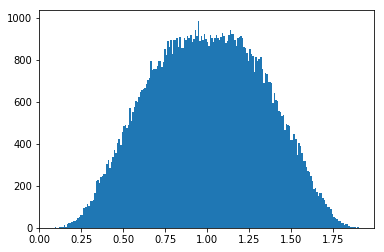

In [27]:
import numpy as np
import pylab as pl
from random import randint
import math
n = 100000
z = np.zeros(n)

for i in range(20):
    for j in range(n):
        z[j] = z[j] + np.random.randint(1, n)/math.pow(2,i)/n
pl.hist(z, bins=200)

# Plotting Normal Distributions

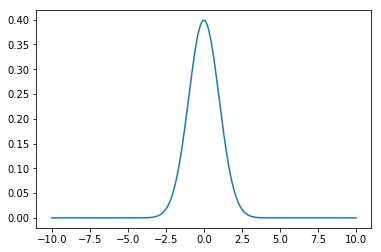

In [28]:
# Plot a normal distribution
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

mean = 0
standard_deviation = 1

# Plot between -10 and 10 with .001 steps.
x = np.arange(-10, 10, 0.001)

# Mean = 0, SD = 1.
plt.plot(x, norm.pdf(x, mean, standard_deviation))

plt.show()

In [29]:
############### Normal Distribution Pulse with width, shift and scale #############
def NormPulse(t: float, a = 1., b = 0., c = 1., d = 0.) -> float:
    x = (t - b)/a
    res = norm.pdf(x, 0, 1)    
    res = d + res * c
    return res

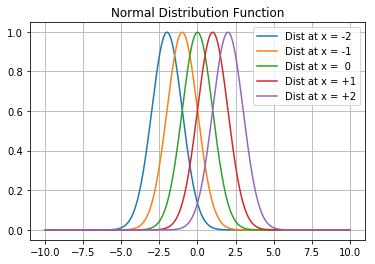

In [30]:
## Plot Different Distribution Pulses
plt.plot(x, NormPulse(x, 1, -2, 2.5), label='Dist at x = -2')
plt.plot(x, NormPulse(x, 1, -1, 2.5), label='Dist at x = -1')
plt.plot(x, NormPulse(x, 1,  0, 2.5), label='Dist at x =  0')
plt.plot(x, NormPulse(x, 1, +1, 2.5), label='Dist at x = +1')
plt.plot(x, NormPulse(x, 1, +2, 2.5), label='Dist at x = +2')
plt.legend(loc='best', numpoints=1)
plt.title('Normal Distribution Function')
plt.grid(True)
plt.show()

(array([10151.,  9998.,  9998.,  9998.,  9830.,  9992., 10066.,  9904.,
         9998., 10065.]),
 array([1.00000e-05, 1.00007e-01, 2.00004e-01, 3.00001e-01, 3.99998e-01,
        4.99995e-01, 5.99992e-01, 6.99989e-01, 7.99986e-01, 8.99983e-01,
        9.99980e-01]),
 <a list of 10 Patch objects>)

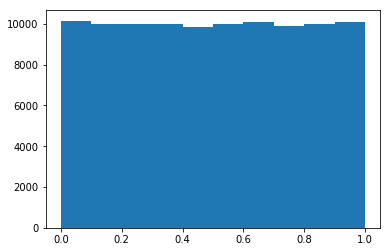

In [31]:
# Research on how Randomisation works
n = 100000
z = np.zeros(n)
for j in range(n):
    z[j] = z[j] + np.random.randint(1, n)/n
pl.hist(z) #, bins=200)